# Descriptive statistics

- get overall info about participants
- assess normality of response times (RTs)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import os

alpha = 0.05

d = pd.read_csv(os.path.join("..", "data", "serial-data.csv"), index_col=0)
agg = pd.read_csv(os.path.join("..", "data", "aggregated-data.csv"), index_col=0)

print("Loading:", len(d), "lines", len(d["ParticipantID"].unique()), "participants")

Loading: 23368 lines 254 participants


## Overall info about participants

In [3]:
TPP = 20  # there are 20 trials in practice
TPM = 72  # there are 72 trials in main part
TPL = 20  # there are 20 trials in a lexical test


print("Number of participants:")
display(pd.DataFrame(d["StudyID"].value_counts() / (TPP + TPM)))

print()
print()
print("Different kinds of designers:")

display(pd.DataFrame(d.groupby("StudyID")["Training"].value_counts() / (TPP + TPM)))

Number of participants:


,count
StudyID,
Main,230.0
Pilot,24.0




Different kinds of designers:


count
StudyID Training               
Main    Non-designer      118.0
        Graphic designer   47.0
        Letter designer    37.0
        Other designer     21.0
        Typographer         7.0
Pilot   Non-designer       16.0
        Letter designer     6.0
        Typographer         2.0

# Assess normality of RTs

The distributions of RTs are not normal, but close enough.

Normality test for RT


,W,pval,normal
RT,0.766133,1.238280e-31,False


Normality test for RT (normalized)


,W,pval,normal
RT (normalized),0.995947,0.043591,False


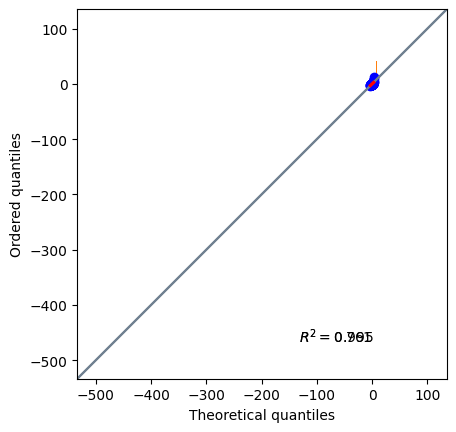

In [4]:
# assess normality of RTs
for col in ["RT", "RT (normalized)"]:
    rts = agg[col]
    rts.plot.hist(bins=50, sharey=True)
    
# test for normality
# null hypothesis: RTs come from a normal distribution
for col in ["RT", "RT (normalized)"]:
    print("Normality test for %s" % col)
    display(pg.normality(agg[col]))

# Q-Q plots
for col in ["RT", "RT (normalized)"]:
    pg.qqplot(agg[col], dist="norm")

In [5]:
from copy import copy
# from scipy.stats import sem

agg["Type"] = "Normal"
conditions = [
  agg["Composite pair"].eq(True) & agg["Congruent pair"].eq(True),
  agg["Composite pair"].eq(True) & agg["Congruent pair"].eq(False),
]
choices = [
  "Composite congruent",
  "Composite incongruent"
]
agg["Type"] = np.select(conditions, choices, default="Normal")
conditions = [
  agg["Training"].eq("Other designer"),
  agg["Training"].eq("Graphic designer"),
  agg["Training"].eq("Typographer"),
  agg["Training"].eq("Letter designer"),
]
choices = [
  "Other design",
  "Other design",
  "Letters",
  "Letters",
]
agg["Focus"] = np.select(conditions, choices, default="None")

display(agg)

auc = agg.groupby(["Training", "Type"]).agg(["mean", "std"])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
auc.reset_index()
auc = auc["AUC (normalized)"]
display(auc)
auc.plot(kind="bar", stacked=False, y="mean", legend=False, yerr="std", title="AUC (normalized)")

auc = agg.groupby(["Focus", "Type"]).agg(["mean", "std"])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
auc.reset_index()
auc = auc["AUC (normalized)"]
display(auc)
auc.plot(kind="bar", stacked=False, y="mean", legend=False, yerr="std", title="AUC (normalized)")


,ParticipantID,Composite pair,Congruent pair,TestID,TrialID,Training,isDesigner,GreekLatin,Correct,Correct (normalized),ET,RT,RT (normalized),Date,AUC,AUC (normalized),Type,Focus
StudyID,,,,,,,,,,,,,,,,,,
Main,0,False,True,1,24,Letter designer,True,NaN,1.000000,3.141593,266.700000,2924.541667,7.963491,2022-06-28 12:51:46,1.000000,3.141593,Normal,Letters
Main,0,True,False,1,24,Letter designer,True,NaN,0.791667,2.487094,266.700000,3640.583333,8.104807,2022-06-28 12:51:46,0.829861,2.291245,Composite incongruent,Letters
Main,0,True,True,1,24,Letter designer,True,NaN,0.708333,2.225295,266.700000,3097.500000,8.021543,2022-06-28 12:51:46,0.756944,2.110508,Composite congruent,Letters
Main,1,False,True,1,24,Other designer,True,NaN,0.833333,2.617994,344.400000,3060.875000,8.020325,2022-06-27 14:52:05,0.833333,2.300524,Normal,Other design
Main,1,True,False,1,24,Other designer,True,NaN,0.208333,0.654498,344.400000,3081.208333,8.029126,2022-06-27 14:52:05,0.208333,0.947970,Composite incongruent,Other design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pilot,252,True,False,1,22,Non-designer,False,NaN,0.818182,2.570394,543.636364,2850.863636,7.948938,2022-05-23 18:01:23,NaN,NaN,Composite incongruent,None
Pilot,252,True,True,1,2,Non-designer,False,NaN,0.500000,1.570796,543.636364,2985.000000,7.996744,2022-05-23 18:01:23,NaN,NaN,Composite congruent,None
Pilot,253,False,False,1,9,Letter designer,True,NaN,0.777778,2.443461,568.181818,2934.333333,7.978502,2022-05-22 08:00:19,NaN,NaN,Normal,Letters


/var/folders/y9/cdnw18g5777bz8cqsp6zgd380000gn/T/ipykernel_44878/1945890159.py:30: FutureWarning: The provided callable <function mean at 0x10548cb80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  auc = agg.groupby(["Training", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
/var/folders/y9/cdnw18g5777bz8cqsp6zgd380000gn/T/ipykernel_44878/1945890159.py:30: FutureWarning: The provided callable <function std at 0x10548ccc0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  auc = agg.groupby(["Training", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
/var/folders/y9/cdnw18g5777bz8cqsp6zgd380000gn/T/ipykernel_44878/1945890159.py:30: FutureWarning: The provi

TypeError: agg function failed [how->mean,dtype->object]